<a href="https://colab.research.google.com/github/chuiyunjun/aps490/blob/chi/model_6_Valve.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setting up

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os 
#!pip install torch==1.10.0
#!pip install kats
#!pip install gdown
import torch.nn as nn
import torch
from tqdm.notebook import tqdm as tqdm
import random
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler

In [ ]:
from google.colab import drive
#drive.mount("/content/gdrive", force_remount=True)
drive.mount('/content/drive')

Mounted at /content/drive


# Obtaining temperature DS

In [ ]:
df_t = []
for filename in os.listdir("/content/drive/My Drive/APS490/Datasets/WeatherData /"):
    if filename.endswith(".csv") or filename.endswith(".xlsx"): 
      print(filename)
      df_t.append(pd.read_csv("/content/drive/My Drive/APS490/Datasets/WeatherData /" + filename))
    else:
        continue

en_climate_hourly_ON_6158355_001-2021_P1H.csv
en_climate_hourly_ON_6158355_002-2021_P1H.csv
en_climate_hourly_ON_6158355_003-2021_P1H.csv
en_climate_hourly_ON_6158355_004-2021_P1H.csv
en_climate_hourly_ON_6158355_005-2021_P1H.csv
en_climate_hourly_ON_6158355_006-2021_P1H.csv
en_climate_hourly_ON_6158355_007-2021_P1H.csv
en_climate_hourly_ON_6158355_008-2021_P1H.csv
en_climate_hourly_ON_6158355_009-2021_P1H.csv
en_climate_hourly_ON_6158355_10-2021_P1H.csv


In [ ]:
df_t = pd.concat(df_t, ignore_index = True)

In [ ]:
columns = ['Longitude (x)', 'Latitude (y)', 'Station Name', 'Climate ID','Year', 'Month', 'Day', 'Time (LST)','Temp Flag', 'Dew Point Temp (°C)', 'Dew Point Temp Flag','Rel Hum (%)', 'Rel Hum Flag', 'Precip. Amount (mm)','Precip. Amount Flag', 'Wind Dir (10s deg)', 'Wind Dir Flag','Wind Spd (km/h)', 'Wind Spd Flag', 'Visibility (km)','Visibility Flag', 'Stn Press (kPa)', 'Stn Press Flag', 'Hmdx','Hmdx Flag', 'Wind Chill', 'Wind Chill Flag', 'Weather']
df_t.drop(columns, inplace=True, axis=1)

In [ ]:
df_t.rename(columns = {'Date/Time (LST)':'DateTime'}, inplace = True)

# Obtaining MNG DS

In [ ]:
folder_path = r'/content/drive/MyDrive/APS490/Datasets/CPPIB 17th Floor_20211014-153532'
savefile_path = r'/content/drive/MyDrive/APS490/Datasets'
savefile_name = r'merge_CPPIB_17th.csv'
slash = '/'

file_name = savefile_path + slash + savefile_name
df_mng = pd.read_csv(file_name)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (5,14,16,30,44,58,72,86,100,114,128,142,156,170,184,198,212,226,240,254,268,282,296,310,324,338,352,366,380,394,408,422,436,450,464,478,492,506,520,534,548,562,576,590,604) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [ ]:
df_mng = df_mng[['DateTime',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature',
      'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint']]

In [ ]:
df_mng = df_mng.dropna()
df_mng

,DateTime,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint
106,2021/02/01 08:50:00.000,75.393906,20.830345,22.799999,20.799999
107,2021/02/01 08:55:00.000,77.659592,20.837288,22.799999,20.799999
108,2021/02/01 09:00:00.000,78.571823,20.823696,22.799999,20.799999
109,2021/02/01 09:05:00.000,77.693443,20.799400,22.799999,20.799999
110,2021/02/01 09:10:00.000,76.556046,20.791056,22.799999,20.799999
...,...,...,...,...,...
73711,2021/08/22 20:35:00.000,100.000000,22.788950,22.799999,20.799999
73712,2021/08/22 20:40:00.000,100.000000,22.813622,22.799999,20.799999
73713,2021/08/22 20:45:00.000,100.000000,22.817038,22.799999,20.799999
73714,2021/08/22 20:50:00.000,100.000000,22.786905,22.799999,20.799999


# Combining Temp and MNG DS

In [ ]:
df_t['DateTime 2'] = pd.to_datetime(df_t.DateTime)
df_mng['DateTime'] = pd.to_datetime(df_mng.DateTime)
df_mng['DateTime 2'] = df_mng['DateTime'].dt.floor('h')
df_mng = pd.merge(df_mng, df_t, how='left', on = 'DateTime 2')
df_mng

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint,DateTime 2,DateTime_y,Temp (°C)
0,2021-02-01 08:50:00,75.393906,20.830345,22.799999,20.799999,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
1,2021-02-01 08:55:00,77.659592,20.837288,22.799999,20.799999,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
2,2021-02-01 09:00:00,78.571823,20.823696,22.799999,20.799999,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
3,2021-02-01 09:05:00,77.693443,20.799400,22.799999,20.799999,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
4,2021-02-01 09:10:00,76.556046,20.791056,22.799999,20.799999,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
...,...,...,...,...,...,...,...,...
73510,2021-08-22 20:35:00,100.000000,22.788950,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73511,2021-08-22 20:40:00,100.000000,22.813622,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73512,2021-08-22 20:45:00,100.000000,22.817038,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73513,2021-08-22 20:50:00,100.000000,22.786905,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7


In [ ]:
df_mng.dropna()
df_mng

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint,DateTime 2,DateTime_y,Temp (°C)
0,2021-02-01 08:50:00,75.393906,20.830345,22.799999,20.799999,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
1,2021-02-01 08:55:00,77.659592,20.837288,22.799999,20.799999,2021-02-01 08:00:00,2021-02-01 08:00,-8.2
2,2021-02-01 09:00:00,78.571823,20.823696,22.799999,20.799999,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
3,2021-02-01 09:05:00,77.693443,20.799400,22.799999,20.799999,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
4,2021-02-01 09:10:00,76.556046,20.791056,22.799999,20.799999,2021-02-01 09:00:00,2021-02-01 09:00,-8.0
...,...,...,...,...,...,...,...,...
73510,2021-08-22 20:35:00,100.000000,22.788950,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73511,2021-08-22 20:40:00,100.000000,22.813622,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73512,2021-08-22 20:45:00,100.000000,22.817038,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7
73513,2021-08-22 20:50:00,100.000000,22.786905,22.799999,20.799999,2021-08-22 20:00:00,2021-08-22 20:00,26.7


In [ ]:
df_mng.to_csv(r'/content/drive/MyDrive/APS490/Datasets/VAV-1704-Valve-analysis.csv')

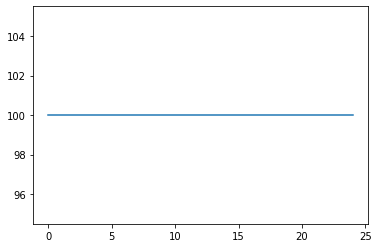

In [ ]:
plt.plot(np.asarray(df_mng[['Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position']])[6025:6050])

# EDA

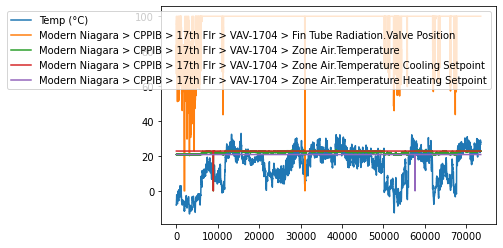

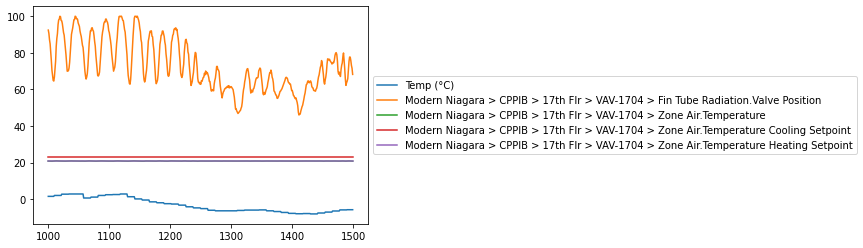

In [ ]:
df_mng.columns
df_mng.plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint'])
df_mng[1000:1500].plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))

In [ ]:
df_mng.corr()

,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint,Temp (°C)
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position,1.000000,0.552970,-0.001082,-0.001082,0.597395
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature,0.552970,1.000000,0.113211,-0.003885,0.908036
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint,-0.001082,0.113211,1.000000,-0.000014,0.001418
Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint,-0.001082,-0.003885,-0.000014,1.000000,-0.002453
Temp (°C),0.597395,0.908036,0.001418,-0.002453,1.000000


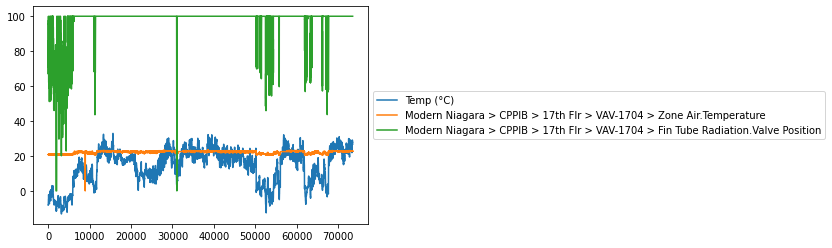

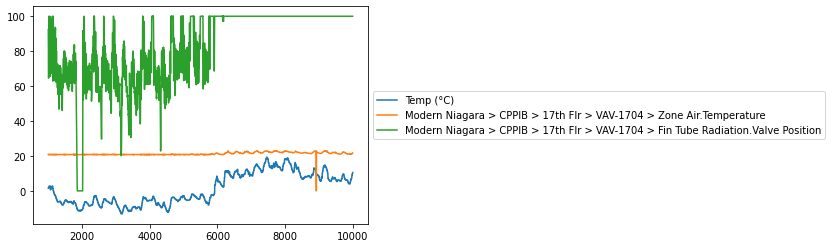

In [ ]:
df_mng.plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
df_mng[1000:10000].plot(y=['Temp (°C)','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature','Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position'])
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))


# ML

In [ ]:
file_name = r'/content/drive/MyDrive/APS490/Datasets/VAV-1704-Valve-analysis.csv'
df = pd.read_csv(file_name)

In [ ]:
date = 'DateTime_x'
input1 = 'Temp (°C)'
input2 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position'
input3 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature'
input4 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Cooling Setpoint'
input5 = 'Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Zone Air.Temperature Heating Setpoint'
input_list = [input1, input2, input3, input4,input5]
# dataset file name
df_input = df[input_list]
df_input = df_input.dropna()

In [ ]:
from torch.autograd import Variable
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import csv 
import shutil
from numpy.lib.index_tricks import diag_indices_from

In [ ]:
def sliding_windows(data, seq_length, pred_length, sc):
    x = []
    y = []


    for i in range(len(data)-seq_length-pred_length):
        _x = data[i:(i+seq_length)]
        _y = data[(i+seq_length):(i+seq_length+pred_length)]
        if not len(_y[_y == 0]):  # y = 0 is set manually by operators. Hence, remove the samples which contain 0 in y
          x.append(_x)
          y.append(_y)
    x = np.array(x)
    y = np.array(y)[:,:,1]
    print(y)
    return x, y

def train_test_split(x, y, param):
  train_size = param['train_size']
  test_size = param['test_size']

  if test_size < 0:
    test_size = len(x) - train_size

  dataX = torch.Tensor(np.array(x)).to('cuda')
  dataY = torch.Tensor(np.array(y)).to('cuda')

  trainX = torch.Tensor(np.array(x[0:train_size])).to('cuda')
  trainY = torch.Tensor(np.array(y[0:train_size])).to('cuda')

  testX = torch.Tensor(np.array(x[train_size:test_size + train_size])).to('cuda')
  testY = torch.Tensor(np.array(y[train_size:test_size + train_size])).to('cuda')
  return dataX, dataY, trainX, trainY, testX, testY

def batch_split(x, y, param):
  l = len(x)
  if 'batch_size' in param:
    batch_size = param['batch_size']
    batch_num = l // param['batch_size'] if l // param['batch_size'] == 0 else l // param['batch_size'] + 1
  elif 'batch_num' in param:
    batch_num = param['batch_num']
    batch_size = l // param['batch_num'] if l // param['batch_num'] == 0 else l // param['batch_num'] + 1
  
  x_list, y_list = [], []
  for i in range(batch_num):
    if (i+1) * batch_size > l:
      x_list.append(x[i * batch_size: ])
      y_list.append(y[i * batch_size: ])
    else: 
      x_list.append(x[i * batch_size: (i+1) * batch_size])
      y_list.append(y[i * batch_size: (i+1) * batch_size])
  # new_X = torch.Tensor(x_list).to('cuda')
  # new_Y = torch.Tensor(y_list).to('cuda')
  return x_list, y_list, batch_num

def train_and_evaluate(param, testX, testY, trainX, trainY, model):
  train_loss_list = torch.tensor([]).to('cuda')
  test_loss_list = torch.tensor([]).to('cuda')
  
  trainX, trainY, num_batches = batch_split(trainX, trainY, param)
  testX, testY, num_batches = batch_split(testX, testY, param)

  optimizer = param["optimizer"]
  if param['criterion'] == 'mse':
    criterion = torch.nn.MSELoss()
  elif param['criterion'] == 'mae':
    criterion = torch.nn.L1Loss()
  # Train the model
  for epoch in tqdm(range(param['num_epochs'])):
      curr_batch_train_loss_list = torch.tensor([]).to('cuda')
      curr_batch_test_loss_list = torch.tensor([]).to('cuda')
      for b in range(num_batches):
        outputs = model(trainX[b])
        optimizer.zero_grad()

        # obtain the loss function
        train_loss = criterion(outputs, trainY[b])

        curr_batch_train_loss_list = torch.cat((curr_batch_train_loss_list ,torch.tensor([train_loss.item()]).to('cuda')))

        train_loss.backward()
        
        optimizer.step()

        with torch.no_grad():
          pred_testY = model(testX[b])
          test_loss = criterion(pred_testY, testY[b])
          curr_batch_test_loss_list = torch.cat((curr_batch_test_loss_list ,torch.tensor([test_loss.item()]).to('cuda')))

      train_loss_list = torch.cat((train_loss_list ,torch.tensor([curr_batch_train_loss_list.mean().item()]).to('cuda')))
      test_loss_list = torch.cat((train_loss_list ,torch.tensor([curr_batch_test_loss_list.mean().item()]).to('cuda')))

      if (epoch + 1) % 50 == 0:
        print("Epoch: %d, train_loss: %1.5f, test_loss: %1.5f" % (epoch, curr_batch_train_loss_list.mean().item(), curr_batch_test_loss_list.mean().item()))
  return model, train_loss_list, test_loss_list

def execute_and_save(param, model_name):

  if param['criterion'] == 'mse':
    criterion = torch.nn.MSELoss()
  elif param['criterion'] == 'mae':
    criterion = torch.nn.L1Loss()
  if model_name == 'lstm':
    model = LSTM(param['num_classes'], param['input_size'], param['hidden_size'], param['num_layers'])
  elif model_name == 'gru':
    model = GRUNet(param['num_classes'], param['input_size'], param['hidden_size'], param['num_layers'])
  else:
    print('Invalid model name. Please double-check.')
    return
  
  model.to('cuda')
  optimizer = torch.optim.Adam(model.parameters(), lr=param['learning_rate'])
  param["optimizer"] = optimizer

  sc = MinMaxScaler()
  training_data = sc.fit_transform(df_input)
  x, y = sliding_windows(training_data, param['seq_length'], param['pred_length'], sc)
  dataX, dataY, trainX, trainY, testX, testY = train_test_split(x, y, param)

  model, train_loss, test_loss = train_and_evaluate(param, testX, testY, trainX, trainY, model)


  model.eval()
  with torch.no_grad():
    test_predict = model(testX)
    loss = criterion(test_predict, testY)
  data_predict = test_predict.data.cpu().numpy()
  data_true = torch.squeeze(testY).data.data.cpu().numpy()

  min = sc.data_min_[1]
  max = sc.data_max_[1]

  data_predict_np = data_predict * (max - min) + min
  data_predict_df = pd.DataFrame(data_predict_np)
  #df.to_csv('pred_rst.csv')
  data_true_np = data_true * (max - min) + min
  data_true_df = pd.DataFrame(data_true_np)
  #df.to_csv('true_value.csv')
  return data_predict_df, data_true_df, data_predict_np, data_true_np, loss, model

## LSTM

In [ ]:
class LSTM(nn.Module):

    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(LSTM, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size,
                            num_layers=num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes).to('cuda')

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to('cuda')
        
        c_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to('cuda')
        
        # Propagate input through LSTM
        ula, (h_out, _) = self.lstm(x, (h_0, c_0))
        
        h_out = h_out.view(-1, self.hidden_size).to('cuda')
        
        out = self.fc(h_out)
        return out

In [ ]:
param_lstm = {
    'num_epochs':1200,
    'batch_num':1,
    'learning_rate': 0.008,
    'input_size': len(input_list),
    'hidden_size': 7,
    'num_layers': 1,
    'num_classes': 24, # should be same as pred_length
    'seq_length': 48,
    'pred_length':24,
    'train_size': 3000,
    'test_size': 600,
}

fields = ['index'] + list(param_lstm.keys()) + ['optimizer', 'loss']

results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_lstm/'
if not os.path.exists(results_path):
  os.mkdir(results_path)
os.chdir(results_path)
for f in os.listdir():
  if os.path.isdir(f):
    shutil.rmtree(f)
  else:
    os.remove(f)

for criteria in ['mse', 'mae']:
#for criteria in ['mse']:
  os.chdir(results_path)
  min_loss, index = -1, -1
  predict_df, true_df, model_to_save = None, None, None
  rows = []
  param_lstm['criterion'] = criteria

  count = 0
  for sq in [48, 60, 72]:
#  for sq in [48]:
    param_lstm['seq_length'] = sq
#    for hidden_size in [7]:
    for hidden_size in [7, 16, 32]:
      param_lstm['hidden_size'] = hidden_size
      row = list(param_lstm.values())
      test_predict_df, test_true_df, test_predict_np, test_true_np, loss, model = execute_and_save(param_lstm, 'lstm')
      rows.append([count] + row + [loss.item()])
      if min_loss < 0 or min_loss > loss:
        min_loss = loss
        index = count
        predict_df, true_df, model_to_save = test_predict_df, test_true_df, model
      count += 1


  filename = "{}_results_report.csv".format(criteria)
  # writing to csv file 
  with open(filename, 'w') as csvfile: 
      csvwriter = csv.writer(csvfile) 
      csvwriter.writerow(fields) 
      csvwriter.writerows(rows)
  os.mkdir(results_path+"{}_optimized_model".format(criteria))
  os.chdir(results_path+"{}_optimized_model".format(criteria))
  predict_df.to_csv('prediction_testY_results_{}(index:{}).csv'.format(criteria, index))
  true_df.to_csv('true_testY_results_{}(index:{}).csv'.format(criteria, index))
  torch.save(model_to_save, 'model_{}(index:{}).pth'.format(criteria, index))

[[0.86952621 0.84601929 0.84166054 ... 0.94043137 0.96146957 0.96044212]
 [0.84601929 0.84166054 0.8350518  ... 0.96146957 0.96044212 0.97757561]
 [0.84166054 0.8350518  0.81245911 ... 0.96044212 0.97757561 0.97437126]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01902, test_loss: 0.02722
Epoch: 99, train_loss: 0.01305, test_loss: 0.01793
Epoch: 149, train_loss: 0.01150, test_loss: 0.01481
Epoch: 199, train_loss: 0.01050, test_loss: 0.01259
Epoch: 249, train_loss: 0.00991, test_loss: 0.01161
Epoch: 299, train_loss: 0.00961, test_loss: 0.01114
Epoch: 349, train_loss: 0.00949, test_loss: 0.01087
Epoch: 399, train_loss: 0.00937, test_loss: 0.01078
Epoch: 449, train_loss: 0.00932, test_loss: 0.01077
Epoch: 499, train_loss: 0.00928, test_loss: 0.01063
Epoch: 549, train_loss: 0.00932, test_loss: 0.01098
Epoch: 599, train_loss: 0.00921, test_loss: 0.01066
Epoch: 649, train_loss: 0.00920, test_loss: 0.01072
Epoch: 699, train_loss: 0.00916, test_loss: 0.01053
Epoch: 749, train_loss: 0.00912, test_loss: 0.01057
Epoch: 799, train_loss: 0.00908, test_loss: 0.01052
Epoch: 849, train_loss: 0.00906, test_loss: 0.01049
Epoch: 899, train_loss: 0.00898, test_loss: 0.01039
Epoch: 949, train_loss: 0.00896, test_loss: 0.01069
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01850, test_loss: 0.02563
Epoch: 99, train_loss: 0.01614, test_loss: 0.02572
Epoch: 149, train_loss: 0.01414, test_loss: 0.02096
Epoch: 199, train_loss: 0.01051, test_loss: 0.01235
Epoch: 249, train_loss: 0.00962, test_loss: 0.01112
Epoch: 299, train_loss: 0.00938, test_loss: 0.01074
Epoch: 349, train_loss: 0.00928, test_loss: 0.01048
Epoch: 399, train_loss: 0.00925, test_loss: 0.01030
Epoch: 449, train_loss: 0.00916, test_loss: 0.01039
Epoch: 499, train_loss: 0.00910, test_loss: 0.01035
Epoch: 549, train_loss: 0.00903, test_loss: 0.01049
Epoch: 599, train_loss: 0.00892, test_loss: 0.01037
Epoch: 649, train_loss: 0.00872, test_loss: 0.01019
Epoch: 699, train_loss: 0.00831, test_loss: 0.00974
Epoch: 749, train_loss: 0.00798, test_loss: 0.00931
Epoch: 799, train_loss: 0.00774, test_loss: 0.00906
Epoch: 849, train_loss: 0.00774, test_loss: 0.00892
Epoch: 899, train_loss: 0.00749, test_loss: 0.00896
Epoch: 949, train_loss: 0.00740, test_loss: 0.00895
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01680, test_loss: 0.02596
Epoch: 99, train_loss: 0.01436, test_loss: 0.02130
Epoch: 149, train_loss: 0.01030, test_loss: 0.01154
Epoch: 199, train_loss: 0.00972, test_loss: 0.01065
Epoch: 249, train_loss: 0.00944, test_loss: 0.01055
Epoch: 299, train_loss: 0.00935, test_loss: 0.01008
Epoch: 349, train_loss: 0.00910, test_loss: 0.01030
Epoch: 399, train_loss: 0.00899, test_loss: 0.01042
Epoch: 449, train_loss: 0.00851, test_loss: 0.01030
Epoch: 499, train_loss: 0.00808, test_loss: 0.00980
Epoch: 549, train_loss: 0.00774, test_loss: 0.00927
Epoch: 599, train_loss: 0.00758, test_loss: 0.00916
Epoch: 649, train_loss: 0.00742, test_loss: 0.01074
Epoch: 699, train_loss: 0.00737, test_loss: 0.00940
Epoch: 749, train_loss: 0.00744, test_loss: 0.00844
Epoch: 799, train_loss: 0.00677, test_loss: 0.00883
Epoch: 849, train_loss: 0.00664, test_loss: 0.00839
Epoch: 899, train_loss: 0.00834, test_loss: 0.00861
Epoch: 949, train_loss: 0.00649, test_loss: 0.00927
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01863, test_loss: 0.02958
Epoch: 99, train_loss: 0.01550, test_loss: 0.02414
Epoch: 149, train_loss: 0.01170, test_loss: 0.01556
Epoch: 199, train_loss: 0.01019, test_loss: 0.01222
Epoch: 249, train_loss: 0.00983, test_loss: 0.01167
Epoch: 299, train_loss: 0.00963, test_loss: 0.01093
Epoch: 349, train_loss: 0.00951, test_loss: 0.01063
Epoch: 399, train_loss: 0.00941, test_loss: 0.01096
Epoch: 449, train_loss: 0.00930, test_loss: 0.01047
Epoch: 499, train_loss: 0.00925, test_loss: 0.01076
Epoch: 549, train_loss: 0.00916, test_loss: 0.01032
Epoch: 599, train_loss: 0.00920, test_loss: 0.01044
Epoch: 649, train_loss: 0.00903, test_loss: 0.01022
Epoch: 699, train_loss: 0.00925, test_loss: 0.01011
Epoch: 749, train_loss: 0.00888, test_loss: 0.01017
Epoch: 799, train_loss: 0.00875, test_loss: 0.01027
Epoch: 849, train_loss: 0.00912, test_loss: 0.01024
Epoch: 899, train_loss: 0.00871, test_loss: 0.00999
Epoch: 949, train_loss: 0.00850, test_loss: 0.00983
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01846, test_loss: 0.02643
Epoch: 99, train_loss: 0.01603, test_loss: 0.02534
Epoch: 149, train_loss: 0.01158, test_loss: 0.01359
Epoch: 199, train_loss: 0.00966, test_loss: 0.01064
Epoch: 249, train_loss: 0.00945, test_loss: 0.01035
Epoch: 299, train_loss: 0.00931, test_loss: 0.01029
Epoch: 349, train_loss: 0.00919, test_loss: 0.01025
Epoch: 399, train_loss: 0.00910, test_loss: 0.01017
Epoch: 449, train_loss: 0.00898, test_loss: 0.01006
Epoch: 499, train_loss: 0.00885, test_loss: 0.00995
Epoch: 549, train_loss: 0.00871, test_loss: 0.00988
Epoch: 599, train_loss: 0.00853, test_loss: 0.00978
Epoch: 649, train_loss: 0.00825, test_loss: 0.00985
Epoch: 699, train_loss: 0.00784, test_loss: 0.00974
Epoch: 749, train_loss: 0.00764, test_loss: 0.00999
Epoch: 799, train_loss: 0.00730, test_loss: 0.00867
Epoch: 849, train_loss: 0.00718, test_loss: 0.00855
Epoch: 899, train_loss: 0.00713, test_loss: 0.00834
Epoch: 949, train_loss: 0.00771, test_loss: 0.00856
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01634, test_loss: 0.02376
Epoch: 99, train_loss: 0.01342, test_loss: 0.01911
Epoch: 149, train_loss: 0.01030, test_loss: 0.01109
Epoch: 199, train_loss: 0.00974, test_loss: 0.01051
Epoch: 249, train_loss: 0.00958, test_loss: 0.01049
Epoch: 299, train_loss: 0.00941, test_loss: 0.01043
Epoch: 349, train_loss: 0.00962, test_loss: 0.01236
Epoch: 399, train_loss: 0.00923, test_loss: 0.01035
Epoch: 449, train_loss: 0.00907, test_loss: 0.01025
Epoch: 499, train_loss: 0.00899, test_loss: 0.00981
Epoch: 549, train_loss: 0.00882, test_loss: 0.00973
Epoch: 599, train_loss: 0.00818, test_loss: 0.00992
Epoch: 649, train_loss: 0.00805, test_loss: 0.00969
Epoch: 699, train_loss: 0.00824, test_loss: 0.00925
Epoch: 749, train_loss: 0.00731, test_loss: 0.00912
Epoch: 799, train_loss: 0.00689, test_loss: 0.00879
Epoch: 849, train_loss: 0.00676, test_loss: 0.00906
Epoch: 899, train_loss: 0.00689, test_loss: 0.00971
Epoch: 949, train_loss: 0.00619, test_loss: 0.00924
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01890, test_loss: 0.03135
Epoch: 99, train_loss: 0.01552, test_loss: 0.02438
Epoch: 149, train_loss: 0.01414, test_loss: 0.02102
Epoch: 199, train_loss: 0.01255, test_loss: 0.01748
Epoch: 249, train_loss: 0.01083, test_loss: 0.01341
Epoch: 299, train_loss: 0.01016, test_loss: 0.01179
Epoch: 349, train_loss: 0.00986, test_loss: 0.01116
Epoch: 399, train_loss: 0.00967, test_loss: 0.01081
Epoch: 449, train_loss: 0.00951, test_loss: 0.01058
Epoch: 499, train_loss: 0.00939, test_loss: 0.01045
Epoch: 549, train_loss: 0.00930, test_loss: 0.01035
Epoch: 599, train_loss: 0.00923, test_loss: 0.01021
Epoch: 649, train_loss: 0.00918, test_loss: 0.01020
Epoch: 699, train_loss: 0.00912, test_loss: 0.01016
Epoch: 749, train_loss: 0.00909, test_loss: 0.01009
Epoch: 799, train_loss: 0.00904, test_loss: 0.01008
Epoch: 849, train_loss: 0.00899, test_loss: 0.01007
Epoch: 899, train_loss: 0.00894, test_loss: 0.01008
Epoch: 949, train_loss: 0.00886, test_loss: 0.00999
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01806, test_loss: 0.02707
Epoch: 99, train_loss: 0.01589, test_loss: 0.02505
Epoch: 149, train_loss: 0.01112, test_loss: 0.01459
Epoch: 199, train_loss: 0.00955, test_loss: 0.01075
Epoch: 249, train_loss: 0.00937, test_loss: 0.01085
Epoch: 299, train_loss: 0.00929, test_loss: 0.01067
Epoch: 349, train_loss: 0.00928, test_loss: 0.01046
Epoch: 399, train_loss: 0.00918, test_loss: 0.01051
Epoch: 449, train_loss: 0.00913, test_loss: 0.01058
Epoch: 499, train_loss: 0.00908, test_loss: 0.01049
Epoch: 549, train_loss: 0.00901, test_loss: 0.01037
Epoch: 599, train_loss: 0.00900, test_loss: 0.01044
Epoch: 649, train_loss: 0.00885, test_loss: 0.01016
Epoch: 699, train_loss: 0.00873, test_loss: 0.01004
Epoch: 749, train_loss: 0.00861, test_loss: 0.00988
Epoch: 799, train_loss: 0.00816, test_loss: 0.00999
Epoch: 849, train_loss: 0.00775, test_loss: 0.00935
Epoch: 899, train_loss: 0.00739, test_loss: 0.00906
Epoch: 949, train_loss: 0.00702, test_loss: 0.01040
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01684, test_loss: 0.02815
Epoch: 99, train_loss: 0.01440, test_loss: 0.02165
Epoch: 149, train_loss: 0.01013, test_loss: 0.01169
Epoch: 199, train_loss: 0.00959, test_loss: 0.01074
Epoch: 249, train_loss: 0.01054, test_loss: 0.01138
Epoch: 299, train_loss: 0.00918, test_loss: 0.01038
Epoch: 349, train_loss: 0.00912, test_loss: 0.01057
Epoch: 399, train_loss: 0.00892, test_loss: 0.01036
Epoch: 449, train_loss: 0.00880, test_loss: 0.01015
Epoch: 499, train_loss: 0.00852, test_loss: 0.01015
Epoch: 549, train_loss: 0.00811, test_loss: 0.00977
Epoch: 599, train_loss: 0.00803, test_loss: 0.00878
Epoch: 649, train_loss: 0.00761, test_loss: 0.00978
Epoch: 699, train_loss: 0.00736, test_loss: 0.00893
Epoch: 749, train_loss: 0.00803, test_loss: 0.00918
Epoch: 799, train_loss: 0.00706, test_loss: 0.00887
Epoch: 849, train_loss: 0.00761, test_loss: 0.00916
Epoch: 899, train_loss: 0.00706, test_loss: 0.00890
Epoch: 949, train_loss: 0.00699, test_loss: 0.00890
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.10091, test_loss: 0.12550
Epoch: 99, train_loss: 0.08600, test_loss: 0.09975
Epoch: 149, train_loss: 0.07847, test_loss: 0.08692
Epoch: 199, train_loss: 0.07598, test_loss: 0.08424
Epoch: 249, train_loss: 0.07489, test_loss: 0.08297
Epoch: 299, train_loss: 0.07439, test_loss: 0.08261
Epoch: 349, train_loss: 0.07415, test_loss: 0.08215
Epoch: 399, train_loss: 0.07391, test_loss: 0.08228
Epoch: 449, train_loss: 0.07372, test_loss: 0.08236
Epoch: 499, train_loss: 0.07341, test_loss: 0.08129
Epoch: 549, train_loss: 0.07348, test_loss: 0.08102
Epoch: 599, train_loss: 0.07292, test_loss: 0.08004
Epoch: 649, train_loss: 0.07205, test_loss: 0.08125
Epoch: 699, train_loss: 0.07223, test_loss: 0.08177
Epoch: 749, train_loss: 0.07063, test_loss: 0.07966
Epoch: 799, train_loss: 0.06976, test_loss: 0.07903
Epoch: 849, train_loss: 0.06904, test_loss: 0.07777
Epoch: 899, train_loss: 0.06777, test_loss: 0.07783
Epoch: 949, train_loss: 0.06690, test_loss: 0.07732
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09804, test_loss: 0.11659
Epoch: 99, train_loss: 0.08721, test_loss: 0.10225
Epoch: 149, train_loss: 0.07668, test_loss: 0.08354
Epoch: 199, train_loss: 0.07443, test_loss: 0.08248
Epoch: 249, train_loss: 0.07341, test_loss: 0.08192
Epoch: 299, train_loss: 0.07278, test_loss: 0.08089
Epoch: 349, train_loss: 0.07104, test_loss: 0.07843
Epoch: 399, train_loss: 0.06766, test_loss: 0.07795
Epoch: 449, train_loss: 0.06558, test_loss: 0.07595
Epoch: 499, train_loss: 0.06419, test_loss: 0.07317
Epoch: 549, train_loss: 0.06389, test_loss: 0.07430
Epoch: 599, train_loss: 0.06593, test_loss: 0.07314
Epoch: 649, train_loss: 0.06054, test_loss: 0.07292
Epoch: 699, train_loss: 0.06009, test_loss: 0.07396
Epoch: 749, train_loss: 0.05969, test_loss: 0.07225
Epoch: 799, train_loss: 0.05981, test_loss: 0.06976
Epoch: 849, train_loss: 0.05882, test_loss: 0.06975
Epoch: 899, train_loss: 0.05808, test_loss: 0.07145
Epoch: 949, train_loss: 0.05767, test_loss: 0.07181
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09901, test_loss: 0.12849
Epoch: 99, train_loss: 0.09161, test_loss: 0.10966
Epoch: 149, train_loss: 0.07875, test_loss: 0.08342
Epoch: 199, train_loss: 0.07538, test_loss: 0.08121
Epoch: 249, train_loss: 0.07941, test_loss: 0.08384
Epoch: 299, train_loss: 0.07343, test_loss: 0.07927
Epoch: 349, train_loss: 0.06920, test_loss: 0.07871
Epoch: 399, train_loss: 0.06655, test_loss: 0.07659
Epoch: 449, train_loss: 0.06528, test_loss: 0.07544
Epoch: 499, train_loss: 0.06436, test_loss: 0.07368
Epoch: 549, train_loss: 0.06323, test_loss: 0.07195
Epoch: 599, train_loss: 0.06145, test_loss: 0.07321
Epoch: 649, train_loss: 0.06241, test_loss: 0.06789
Epoch: 699, train_loss: 0.05982, test_loss: 0.07073
Epoch: 749, train_loss: 0.05975, test_loss: 0.07045
Epoch: 799, train_loss: 0.05830, test_loss: 0.06890
Epoch: 849, train_loss: 0.06034, test_loss: 0.07307
Epoch: 899, train_loss: 0.05767, test_loss: 0.07115
Epoch: 949, train_loss: 0.05510, test_loss: 0.07673
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09550, test_loss: 0.11269
Epoch: 99, train_loss: 0.07830, test_loss: 0.08587
Epoch: 149, train_loss: 0.07584, test_loss: 0.08196
Epoch: 199, train_loss: 0.07352, test_loss: 0.08115
Epoch: 249, train_loss: 0.07266, test_loss: 0.08037
Epoch: 299, train_loss: 0.07160, test_loss: 0.08011
Epoch: 349, train_loss: 0.06999, test_loss: 0.07914
Epoch: 399, train_loss: 0.06911, test_loss: 0.07865
Epoch: 449, train_loss: 0.06833, test_loss: 0.07783
Epoch: 499, train_loss: 0.06760, test_loss: 0.07746
Epoch: 549, train_loss: 0.06684, test_loss: 0.07677
Epoch: 599, train_loss: 0.06618, test_loss: 0.07648
Epoch: 649, train_loss: 0.06556, test_loss: 0.07616
Epoch: 699, train_loss: 0.06509, test_loss: 0.07582
Epoch: 749, train_loss: 0.06468, test_loss: 0.07511
Epoch: 799, train_loss: 0.06440, test_loss: 0.07464
Epoch: 849, train_loss: 0.06371, test_loss: 0.07484
Epoch: 899, train_loss: 0.06351, test_loss: 0.07371
Epoch: 949, train_loss: 0.06315, test_loss: 0.07308
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09771, test_loss: 0.12185
Epoch: 99, train_loss: 0.08097, test_loss: 0.09039
Epoch: 149, train_loss: 0.07533, test_loss: 0.08287
Epoch: 199, train_loss: 0.07524, test_loss: 0.08468
Epoch: 249, train_loss: 0.07346, test_loss: 0.08221
Epoch: 299, train_loss: 0.07277, test_loss: 0.08048
Epoch: 349, train_loss: 0.07067, test_loss: 0.07930
Epoch: 399, train_loss: 0.06766, test_loss: 0.07777
Epoch: 449, train_loss: 0.06591, test_loss: 0.07604
Epoch: 499, train_loss: 0.06577, test_loss: 0.07532
Epoch: 549, train_loss: 0.06420, test_loss: 0.07505
Epoch: 599, train_loss: 0.06319, test_loss: 0.07368
Epoch: 649, train_loss: 0.06239, test_loss: 0.07231
Epoch: 699, train_loss: 0.06368, test_loss: 0.07195
Epoch: 749, train_loss: 0.06279, test_loss: 0.07140
Epoch: 799, train_loss: 0.06235, test_loss: 0.07131
Epoch: 849, train_loss: 0.06212, test_loss: 0.07102
Epoch: 899, train_loss: 0.06164, test_loss: 0.07083
Epoch: 949, train_loss: 0.06117, test_loss: 0.07065
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09777, test_loss: 0.12366
Epoch: 99, train_loss: 0.08872, test_loss: 0.08777
Epoch: 149, train_loss: 0.07611, test_loss: 0.08223
Epoch: 199, train_loss: 0.07473, test_loss: 0.08293
Epoch: 249, train_loss: 0.07391, test_loss: 0.08401
Epoch: 299, train_loss: 0.06987, test_loss: 0.08031
Epoch: 349, train_loss: 0.06726, test_loss: 0.07590
Epoch: 399, train_loss: 0.06345, test_loss: 0.07415
Epoch: 449, train_loss: 0.06263, test_loss: 0.07255
Epoch: 499, train_loss: 0.06156, test_loss: 0.07052
Epoch: 549, train_loss: 0.06947, test_loss: 0.07568
Epoch: 599, train_loss: 0.06257, test_loss: 0.07313
Epoch: 649, train_loss: 0.06146, test_loss: 0.07100
Epoch: 699, train_loss: 0.06103, test_loss: 0.07083
Epoch: 749, train_loss: 0.06068, test_loss: 0.07149
Epoch: 799, train_loss: 0.06111, test_loss: 0.07526
Epoch: 849, train_loss: 0.05937, test_loss: 0.06952
Epoch: 899, train_loss: 0.06258, test_loss: 0.07321
Epoch: 949, train_loss: 0.06006, test_loss: 0.07856
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.10155, test_loss: 0.12360
Epoch: 99, train_loss: 0.08852, test_loss: 0.10505
Epoch: 149, train_loss: 0.07735, test_loss: 0.08565
Epoch: 199, train_loss: 0.07503, test_loss: 0.08372
Epoch: 249, train_loss: 0.07464, test_loss: 0.08345
Epoch: 299, train_loss: 0.07429, test_loss: 0.08293
Epoch: 349, train_loss: 0.07389, test_loss: 0.08214
Epoch: 399, train_loss: 0.07344, test_loss: 0.08144
Epoch: 449, train_loss: 0.07291, test_loss: 0.08077
Epoch: 499, train_loss: 0.07193, test_loss: 0.07972
Epoch: 549, train_loss: 0.07046, test_loss: 0.07880
Epoch: 599, train_loss: 0.06900, test_loss: 0.07757
Epoch: 649, train_loss: 0.06730, test_loss: 0.07687
Epoch: 699, train_loss: 0.06626, test_loss: 0.07709
Epoch: 749, train_loss: 0.06560, test_loss: 0.07649
Epoch: 799, train_loss: 0.06509, test_loss: 0.07588
Epoch: 849, train_loss: 0.06478, test_loss: 0.07489
Epoch: 899, train_loss: 0.06428, test_loss: 0.07459
Epoch: 949, train_loss: 0.06424, test_loss: 0.07575
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09940, test_loss: 0.11978
Epoch: 99, train_loss: 0.09091, test_loss: 0.10836
Epoch: 149, train_loss: 0.07710, test_loss: 0.08472
Epoch: 199, train_loss: 0.07474, test_loss: 0.08200
Epoch: 249, train_loss: 0.07316, test_loss: 0.08264
Epoch: 299, train_loss: 0.07179, test_loss: 0.08088
Epoch: 349, train_loss: 0.07014, test_loss: 0.07934
Epoch: 399, train_loss: 0.06672, test_loss: 0.07635
Epoch: 449, train_loss: 0.06516, test_loss: 0.07565
Epoch: 499, train_loss: 0.06402, test_loss: 0.07709
Epoch: 549, train_loss: 0.06733, test_loss: 0.07528
Epoch: 599, train_loss: 0.06214, test_loss: 0.07541
Epoch: 649, train_loss: 0.06132, test_loss: 0.07152
Epoch: 699, train_loss: 0.06142, test_loss: 0.07245
Epoch: 749, train_loss: 0.06051, test_loss: 0.07575
Epoch: 799, train_loss: 0.06113, test_loss: 0.07360
Epoch: 849, train_loss: 0.06532, test_loss: 0.07026
Epoch: 899, train_loss: 0.05724, test_loss: 0.06913
Epoch: 949, train_loss: 0.05685, test_loss: 0.06821
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09912, test_loss: 0.12648
Epoch: 99, train_loss: 0.09160, test_loss: 0.11058
Epoch: 149, train_loss: 0.07553, test_loss: 0.08513
Epoch: 199, train_loss: 0.07514, test_loss: 0.08573
Epoch: 249, train_loss: 0.07698, test_loss: 0.08492
Epoch: 299, train_loss: 0.07347, test_loss: 0.08335
Epoch: 349, train_loss: 0.07185, test_loss: 0.08240
Epoch: 399, train_loss: 0.06975, test_loss: 0.08037
Epoch: 449, train_loss: 0.06942, test_loss: 0.07972
Epoch: 499, train_loss: 0.06548, test_loss: 0.07821
Epoch: 549, train_loss: 0.06538, test_loss: 0.07804
Epoch: 599, train_loss: 0.06330, test_loss: 0.07465
Epoch: 649, train_loss: 0.06221, test_loss: 0.07197
Epoch: 699, train_loss: 0.06186, test_loss: 0.07099
Epoch: 749, train_loss: 0.06127, test_loss: 0.07176
Epoch: 799, train_loss: 0.06083, test_loss: 0.06990
Epoch: 849, train_loss: 0.05840, test_loss: 0.07645
Epoch: 899, train_loss: 0.05768, test_loss: 0.07632
Epoch: 949, train_loss: 0.05545, test_loss: 0.07881
Epoch: 999, tr

## GRU

In [ ]:
class GRUNet(nn.Module):
    def __init__(self, num_classes, input_size, hidden_size, num_layers):
        super(GRUNet, self).__init__()
        
        self.num_classes = num_classes
        self.num_layers = num_layers
        self.input_size = input_size
        self.hidden_size = hidden_size
        
        self.gru = nn.GRU(input_size, hidden_size, num_layers, batch_first=True)
        
        self.fc = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        h_0 = Variable(torch.zeros(
            self.num_layers, x.size(0), self.hidden_size)).to('cuda')
        
        h_out, _ = self.gru(x, h_0)
        
        h_out = h_out[:, -1, :].to('cuda')
        
        out = self.fc(h_out).to('cuda')
        
        return out

In [ ]:
param_gru = {
    'num_epochs':1200,
    'batch_num': 1,
    'learning_rate': 0.008,
    'input_size': len(input_list),
    'hidden_size': 7,
    'num_layers': 1,
    'num_classes': 24, # dummy variable, same as pred_length
    'seq_length': 48,
    'pred_length':24,
    'train_size': 3000,
    'test_size': 600,
    'criterion': 'mse'
}

fields = ['index'] + list(param_gru.keys()) + ['optimizer', 'loss']
results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_gru/'
if not os.path.exists(results_path):
  os.mkdir(results_path)
os.chdir(results_path)
for f in os.listdir():
  if os.path.isdir(f):
    shutil.rmtree(f)
  else:
    os.remove(f)

for criteria in ['mse', 'mae']:
  os.chdir(results_path)
  min_loss, index = -1, -1
  predict_df, true_df, model_to_save = None, None, None
  rows = []
  param_gru['criterion'] = criteria

  count = 0
  for sq in [48, 60, 72]:
    param_gru['seq_length'] = sq
    for hidden_size in [7, 16, 32]:
      param_gru['hidden_size'] = hidden_size
      row = list(param_gru.values())
      test_predict_df, test_true_df, test_predict_np, test_true_np, loss, model = execute_and_save(param_gru, 'gru')
      rows.append([count] + row + [loss.item()])
      if min_loss < 0 or min_loss > loss:
        min_loss = loss
        index = count
        predict_df, true_df, model_to_save = test_predict_df, test_true_df, model
      count += 1


  filename = "{}_results_report.csv".format(criteria)
  # writing to csv file 
  with open(filename, 'w') as csvfile: 
      csvwriter = csv.writer(csvfile) 
      csvwriter.writerow(fields) 
      csvwriter.writerows(rows)
  os.mkdir(results_path+"{}_optimized_model".format(criteria))
  os.chdir(results_path+"{}_optimized_model".format(criteria))
  predict_df.to_csv('prediction_testY_results_{}(index:{}).csv'.format(criteria, index))
  true_df.to_csv('true_testY_results_{}(index:{}).csv'.format(criteria, index))
  torch.save(model_to_save, 'model_{}(index:{}).pth'.format(criteria, index))

[[0.86952621 0.84601929 0.84166054 ... 0.94043137 0.96146957 0.96044212]
 [0.84601929 0.84166054 0.8350518  ... 0.96146957 0.96044212 0.97757561]
 [0.84166054 0.8350518  0.81245911 ... 0.96044212 0.97757561 0.97437126]
 ...
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]
 [1.         1.         1.         ... 1.         1.         1.        ]]


  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01974, test_loss: 0.03345
Epoch: 99, train_loss: 0.01609, test_loss: 0.02510
Epoch: 149, train_loss: 0.01327, test_loss: 0.01809
Epoch: 199, train_loss: 0.01121, test_loss: 0.01337
Epoch: 249, train_loss: 0.01005, test_loss: 0.01120
Epoch: 299, train_loss: 0.00946, test_loss: 0.01047
Epoch: 349, train_loss: 0.00915, test_loss: 0.01041
Epoch: 399, train_loss: 0.00891, test_loss: 0.01049
Epoch: 449, train_loss: 0.00873, test_loss: 0.01045
Epoch: 499, train_loss: 0.00860, test_loss: 0.01039
Epoch: 549, train_loss: 0.00851, test_loss: 0.01060
Epoch: 599, train_loss: 0.00839, test_loss: 0.01009
Epoch: 649, train_loss: 0.00832, test_loss: 0.01001
Epoch: 699, train_loss: 0.00827, test_loss: 0.01001
Epoch: 749, train_loss: 0.00823, test_loss: 0.01000
Epoch: 799, train_loss: 0.00822, test_loss: 0.00997
Epoch: 849, train_loss: 0.00805, test_loss: 0.00951
Epoch: 899, train_loss: 0.00799, test_loss: 0.00952
Epoch: 949, train_loss: 0.00791, test_loss: 0.00947
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01366, test_loss: 0.01903
Epoch: 99, train_loss: 0.01047, test_loss: 0.01183
Epoch: 149, train_loss: 0.00974, test_loss: 0.01073
Epoch: 199, train_loss: 0.00947, test_loss: 0.01037
Epoch: 249, train_loss: 0.00915, test_loss: 0.01014
Epoch: 299, train_loss: 0.00863, test_loss: 0.01023
Epoch: 349, train_loss: 0.00836, test_loss: 0.01015
Epoch: 399, train_loss: 0.00884, test_loss: 0.00984
Epoch: 449, train_loss: 0.00805, test_loss: 0.01009
Epoch: 499, train_loss: 0.00798, test_loss: 0.00990
Epoch: 549, train_loss: 0.00831, test_loss: 0.00996
Epoch: 599, train_loss: 0.00776, test_loss: 0.00999
Epoch: 649, train_loss: 0.00769, test_loss: 0.01101
Epoch: 699, train_loss: 0.00753, test_loss: 0.00990
Epoch: 749, train_loss: 0.00745, test_loss: 0.00948
Epoch: 799, train_loss: 0.00729, test_loss: 0.00948
Epoch: 849, train_loss: 0.00720, test_loss: 0.00946
Epoch: 899, train_loss: 0.00710, test_loss: 0.00927
Epoch: 949, train_loss: 0.00719, test_loss: 0.00917
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01395, test_loss: 0.02105
Epoch: 99, train_loss: 0.01024, test_loss: 0.01156
Epoch: 149, train_loss: 0.00954, test_loss: 0.01048
Epoch: 199, train_loss: 0.00915, test_loss: 0.01013
Epoch: 249, train_loss: 0.00863, test_loss: 0.01011
Epoch: 299, train_loss: 0.00829, test_loss: 0.01036
Epoch: 349, train_loss: 0.00800, test_loss: 0.01030
Epoch: 399, train_loss: 0.00782, test_loss: 0.00999
Epoch: 449, train_loss: 0.00770, test_loss: 0.00988
Epoch: 499, train_loss: 0.00763, test_loss: 0.00966
Epoch: 549, train_loss: 0.00735, test_loss: 0.00960
Epoch: 599, train_loss: 0.00706, test_loss: 0.00939
Epoch: 649, train_loss: 0.00680, test_loss: 0.00970
Epoch: 699, train_loss: 0.00642, test_loss: 0.00864
Epoch: 749, train_loss: 0.00621, test_loss: 0.00890
Epoch: 799, train_loss: 0.00606, test_loss: 0.00871
Epoch: 849, train_loss: 0.00594, test_loss: 0.00913
Epoch: 899, train_loss: 0.00585, test_loss: 0.01095
Epoch: 949, train_loss: 0.00570, test_loss: 0.01243
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.02012, test_loss: 0.03254
Epoch: 99, train_loss: 0.01401, test_loss: 0.02002
Epoch: 149, train_loss: 0.01112, test_loss: 0.01323
Epoch: 199, train_loss: 0.01017, test_loss: 0.01163
Epoch: 249, train_loss: 0.00972, test_loss: 0.01083
Epoch: 299, train_loss: 0.00945, test_loss: 0.01044
Epoch: 349, train_loss: 0.00919, test_loss: 0.01023
Epoch: 399, train_loss: 0.00889, test_loss: 0.01010
Epoch: 449, train_loss: 0.00863, test_loss: 0.01003
Epoch: 499, train_loss: 0.00838, test_loss: 0.01001
Epoch: 549, train_loss: 0.00824, test_loss: 0.00982
Epoch: 599, train_loss: 0.00815, test_loss: 0.00989
Epoch: 649, train_loss: 0.00806, test_loss: 0.00965
Epoch: 699, train_loss: 0.00798, test_loss: 0.00960
Epoch: 749, train_loss: 0.00787, test_loss: 0.00969
Epoch: 799, train_loss: 0.00782, test_loss: 0.01016
Epoch: 849, train_loss: 0.00773, test_loss: 0.00960
Epoch: 899, train_loss: 0.00768, test_loss: 0.00928
Epoch: 949, train_loss: 0.00761, test_loss: 0.00946
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01517, test_loss: 0.02404
Epoch: 99, train_loss: 0.01217, test_loss: 0.01595
Epoch: 149, train_loss: 0.01036, test_loss: 0.01162
Epoch: 199, train_loss: 0.00968, test_loss: 0.01060
Epoch: 249, train_loss: 0.00910, test_loss: 0.01067
Epoch: 299, train_loss: 0.00869, test_loss: 0.01044
Epoch: 349, train_loss: 0.00838, test_loss: 0.01005
Epoch: 399, train_loss: 0.00817, test_loss: 0.00969
Epoch: 449, train_loss: 0.00804, test_loss: 0.00955
Epoch: 499, train_loss: 0.00795, test_loss: 0.00987
Epoch: 549, train_loss: 0.00789, test_loss: 0.00978
Epoch: 599, train_loss: 0.00773, test_loss: 0.00931
Epoch: 649, train_loss: 0.00769, test_loss: 0.00950
Epoch: 699, train_loss: 0.00753, test_loss: 0.00946
Epoch: 749, train_loss: 0.00744, test_loss: 0.00923
Epoch: 799, train_loss: 0.00730, test_loss: 0.00930
Epoch: 849, train_loss: 0.00717, test_loss: 0.00948
Epoch: 899, train_loss: 0.00707, test_loss: 0.00922
Epoch: 949, train_loss: 0.00690, test_loss: 0.00935
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01369, test_loss: 0.02047
Epoch: 99, train_loss: 0.01018, test_loss: 0.01148
Epoch: 149, train_loss: 0.00955, test_loss: 0.01025
Epoch: 199, train_loss: 0.00922, test_loss: 0.01008
Epoch: 249, train_loss: 0.00866, test_loss: 0.01042
Epoch: 299, train_loss: 0.00820, test_loss: 0.00960
Epoch: 349, train_loss: 0.00788, test_loss: 0.00924
Epoch: 399, train_loss: 0.00772, test_loss: 0.00900
Epoch: 449, train_loss: 0.00741, test_loss: 0.00900
Epoch: 499, train_loss: 0.00746, test_loss: 0.00912
Epoch: 549, train_loss: 0.00694, test_loss: 0.00903
Epoch: 599, train_loss: 0.00667, test_loss: 0.00863
Epoch: 649, train_loss: 0.00652, test_loss: 0.00859
Epoch: 699, train_loss: 0.00663, test_loss: 0.01000
Epoch: 749, train_loss: 0.00618, test_loss: 0.00874
Epoch: 799, train_loss: 0.00608, test_loss: 0.00878
Epoch: 849, train_loss: 0.00577, test_loss: 0.00889
Epoch: 899, train_loss: 0.00561, test_loss: 0.00960
Epoch: 949, train_loss: 0.00551, test_loss: 0.00970
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01913, test_loss: 0.02809
Epoch: 99, train_loss: 0.01524, test_loss: 0.02317
Epoch: 149, train_loss: 0.01374, test_loss: 0.01966
Epoch: 199, train_loss: 0.01202, test_loss: 0.01554
Epoch: 249, train_loss: 0.01093, test_loss: 0.01310
Epoch: 299, train_loss: 0.01030, test_loss: 0.01179
Epoch: 349, train_loss: 0.00991, test_loss: 0.01104
Epoch: 399, train_loss: 0.00967, test_loss: 0.01062
Epoch: 449, train_loss: 0.00951, test_loss: 0.01039
Epoch: 499, train_loss: 0.00939, test_loss: 0.01024
Epoch: 549, train_loss: 0.00928, test_loss: 0.01014
Epoch: 599, train_loss: 0.00919, test_loss: 0.01008
Epoch: 649, train_loss: 0.00911, test_loss: 0.01003
Epoch: 699, train_loss: 0.00904, test_loss: 0.01001
Epoch: 749, train_loss: 0.00897, test_loss: 0.01000
Epoch: 799, train_loss: 0.00892, test_loss: 0.00997
Epoch: 849, train_loss: 0.00885, test_loss: 0.00993
Epoch: 899, train_loss: 0.00878, test_loss: 0.00986
Epoch: 949, train_loss: 0.00875, test_loss: 0.00996
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01430, test_loss: 0.02051
Epoch: 99, train_loss: 0.01105, test_loss: 0.01401
Epoch: 149, train_loss: 0.00985, test_loss: 0.01104
Epoch: 199, train_loss: 0.00958, test_loss: 0.01053
Epoch: 249, train_loss: 0.00943, test_loss: 0.01029
Epoch: 299, train_loss: 0.00930, test_loss: 0.01017
Epoch: 349, train_loss: 0.00913, test_loss: 0.01015
Epoch: 399, train_loss: 0.00891, test_loss: 0.01024
Epoch: 449, train_loss: 0.00867, test_loss: 0.01033
Epoch: 499, train_loss: 0.00840, test_loss: 0.01025
Epoch: 549, train_loss: 0.00812, test_loss: 0.01026
Epoch: 599, train_loss: 0.00792, test_loss: 0.01010
Epoch: 649, train_loss: 0.00774, test_loss: 0.00983
Epoch: 699, train_loss: 0.00756, test_loss: 0.00980
Epoch: 749, train_loss: 0.00741, test_loss: 0.00962
Epoch: 799, train_loss: 0.00723, test_loss: 0.00967
Epoch: 849, train_loss: 0.00707, test_loss: 0.00967
Epoch: 899, train_loss: 0.00744, test_loss: 0.00931
Epoch: 949, train_loss: 0.00686, test_loss: 0.00959
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.01298, test_loss: 0.01910
Epoch: 99, train_loss: 0.00977, test_loss: 0.01071
Epoch: 149, train_loss: 0.00936, test_loss: 0.01019
Epoch: 199, train_loss: 0.00905, test_loss: 0.01015
Epoch: 249, train_loss: 0.00868, test_loss: 0.01027
Epoch: 299, train_loss: 0.00832, test_loss: 0.00994
Epoch: 349, train_loss: 0.00804, test_loss: 0.00951
Epoch: 399, train_loss: 0.00834, test_loss: 0.01081
Epoch: 449, train_loss: 0.00740, test_loss: 0.00996
Epoch: 499, train_loss: 0.00700, test_loss: 0.00986
Epoch: 549, train_loss: 0.00670, test_loss: 0.01023
Epoch: 599, train_loss: 0.00691, test_loss: 0.01062
Epoch: 649, train_loss: 0.00641, test_loss: 0.01040
Epoch: 699, train_loss: 0.00630, test_loss: 0.01050
Epoch: 749, train_loss: 0.00614, test_loss: 0.01159
Epoch: 799, train_loss: 0.00600, test_loss: 0.01197
Epoch: 849, train_loss: 0.00592, test_loss: 0.01125
Epoch: 899, train_loss: 0.00581, test_loss: 0.01159
Epoch: 949, train_loss: 0.00611, test_loss: 0.01022
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09691, test_loss: 0.11695
Epoch: 99, train_loss: 0.08333, test_loss: 0.09421
Epoch: 149, train_loss: 0.07744, test_loss: 0.08282
Epoch: 199, train_loss: 0.07515, test_loss: 0.07966
Epoch: 249, train_loss: 0.07421, test_loss: 0.07867
Epoch: 299, train_loss: 0.07363, test_loss: 0.07817
Epoch: 349, train_loss: 0.07311, test_loss: 0.07779
Epoch: 399, train_loss: 0.07251, test_loss: 0.07742
Epoch: 449, train_loss: 0.07176, test_loss: 0.07688
Epoch: 499, train_loss: 0.07088, test_loss: 0.07649
Epoch: 549, train_loss: 0.07036, test_loss: 0.07813
Epoch: 599, train_loss: 0.06934, test_loss: 0.07714
Epoch: 649, train_loss: 0.06896, test_loss: 0.07708
Epoch: 699, train_loss: 0.07081, test_loss: 0.08054
Epoch: 749, train_loss: 0.06784, test_loss: 0.07601
Epoch: 799, train_loss: 0.07296, test_loss: 0.07534
Epoch: 849, train_loss: 0.06609, test_loss: 0.07500
Epoch: 899, train_loss: 0.06483, test_loss: 0.07308
Epoch: 949, train_loss: 0.06365, test_loss: 0.07364
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09133, test_loss: 0.10643
Epoch: 99, train_loss: 0.07781, test_loss: 0.08331
Epoch: 149, train_loss: 0.07517, test_loss: 0.08011
Epoch: 199, train_loss: 0.07381, test_loss: 0.07930
Epoch: 249, train_loss: 0.07226, test_loss: 0.07840
Epoch: 299, train_loss: 0.07034, test_loss: 0.07818
Epoch: 349, train_loss: 0.06898, test_loss: 0.07474
Epoch: 399, train_loss: 0.06608, test_loss: 0.07593
Epoch: 449, train_loss: 0.06473, test_loss: 0.07512
Epoch: 499, train_loss: 0.06469, test_loss: 0.07892
Epoch: 549, train_loss: 0.06169, test_loss: 0.07251
Epoch: 599, train_loss: 0.06097, test_loss: 0.07411
Epoch: 649, train_loss: 0.05953, test_loss: 0.07367
Epoch: 699, train_loss: 0.05880, test_loss: 0.07369
Epoch: 749, train_loss: 0.05868, test_loss: 0.07454
Epoch: 799, train_loss: 0.05767, test_loss: 0.07559
Epoch: 849, train_loss: 0.05765, test_loss: 0.07508
Epoch: 899, train_loss: 0.05692, test_loss: 0.08017
Epoch: 949, train_loss: 0.05664, test_loss: 0.08046
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.08591, test_loss: 0.09968
Epoch: 99, train_loss: 0.07607, test_loss: 0.08043
Epoch: 149, train_loss: 0.07399, test_loss: 0.07831
Epoch: 199, train_loss: 0.07082, test_loss: 0.07811
Epoch: 249, train_loss: 0.06737, test_loss: 0.07501
Epoch: 299, train_loss: 0.06628, test_loss: 0.08128
Epoch: 349, train_loss: 0.06292, test_loss: 0.07104
Epoch: 399, train_loss: 0.06055, test_loss: 0.07132
Epoch: 449, train_loss: 0.06007, test_loss: 0.06878
Epoch: 499, train_loss: 0.05858, test_loss: 0.07303
Epoch: 549, train_loss: 0.05706, test_loss: 0.07108
Epoch: 599, train_loss: 0.05537, test_loss: 0.07365
Epoch: 649, train_loss: 0.05419, test_loss: 0.07692
Epoch: 699, train_loss: 0.05453, test_loss: 0.08015
Epoch: 749, train_loss: 0.05390, test_loss: 0.08098
Epoch: 799, train_loss: 0.05455, test_loss: 0.08201
Epoch: 849, train_loss: 0.05408, test_loss: 0.08053
Epoch: 899, train_loss: 0.05215, test_loss: 0.08432
Epoch: 949, train_loss: 0.04996, test_loss: 0.08017
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09830, test_loss: 0.11910
Epoch: 99, train_loss: 0.07938, test_loss: 0.08711
Epoch: 149, train_loss: 0.07467, test_loss: 0.08098
Epoch: 199, train_loss: 0.07323, test_loss: 0.08076
Epoch: 249, train_loss: 0.07209, test_loss: 0.07950
Epoch: 299, train_loss: 0.07100, test_loss: 0.07840
Epoch: 349, train_loss: 0.06993, test_loss: 0.07973
Epoch: 399, train_loss: 0.06930, test_loss: 0.07785
Epoch: 449, train_loss: 0.06857, test_loss: 0.07799
Epoch: 499, train_loss: 0.06790, test_loss: 0.07658
Epoch: 549, train_loss: 0.06684, test_loss: 0.07767
Epoch: 599, train_loss: 0.06594, test_loss: 0.07654
Epoch: 649, train_loss: 0.06505, test_loss: 0.07546
Epoch: 699, train_loss: 0.06419, test_loss: 0.07547
Epoch: 749, train_loss: 0.06321, test_loss: 0.07385
Epoch: 799, train_loss: 0.06254, test_loss: 0.07264
Epoch: 849, train_loss: 0.06201, test_loss: 0.07290
Epoch: 899, train_loss: 0.06179, test_loss: 0.07232
Epoch: 949, train_loss: 0.06147, test_loss: 0.07199
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.08664, test_loss: 0.10052
Epoch: 99, train_loss: 0.07516, test_loss: 0.08025
Epoch: 149, train_loss: 0.07168, test_loss: 0.07878
Epoch: 199, train_loss: 0.06969, test_loss: 0.07684
Epoch: 249, train_loss: 0.06751, test_loss: 0.07686
Epoch: 299, train_loss: 0.06612, test_loss: 0.07361
Epoch: 349, train_loss: 0.06511, test_loss: 0.07706
Epoch: 399, train_loss: 0.06248, test_loss: 0.07748
Epoch: 449, train_loss: 0.06144, test_loss: 0.07368
Epoch: 499, train_loss: 0.06032, test_loss: 0.07350
Epoch: 549, train_loss: 0.05967, test_loss: 0.07424
Epoch: 599, train_loss: 0.05879, test_loss: 0.07205
Epoch: 649, train_loss: 0.05759, test_loss: 0.07467
Epoch: 699, train_loss: 0.05667, test_loss: 0.07783
Epoch: 749, train_loss: 0.05587, test_loss: 0.07750
Epoch: 799, train_loss: 0.05544, test_loss: 0.07468
Epoch: 849, train_loss: 0.05452, test_loss: 0.07606
Epoch: 899, train_loss: 0.05450, test_loss: 0.07951
Epoch: 949, train_loss: 0.05450, test_loss: 0.07435
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.08267, test_loss: 0.09432
Epoch: 99, train_loss: 0.07471, test_loss: 0.07930
Epoch: 149, train_loss: 0.07322, test_loss: 0.07841
Epoch: 199, train_loss: 0.07124, test_loss: 0.07624
Epoch: 249, train_loss: 0.06814, test_loss: 0.07483
Epoch: 299, train_loss: 0.06562, test_loss: 0.07640
Epoch: 349, train_loss: 0.06266, test_loss: 0.07291
Epoch: 399, train_loss: 0.06041, test_loss: 0.06968
Epoch: 449, train_loss: 0.05989, test_loss: 0.07916
Epoch: 499, train_loss: 0.05668, test_loss: 0.07571
Epoch: 549, train_loss: 0.05721, test_loss: 0.07525
Epoch: 599, train_loss: 0.05521, test_loss: 0.07930
Epoch: 649, train_loss: 0.05500, test_loss: 0.07736
Epoch: 699, train_loss: 0.05293, test_loss: 0.08046
Epoch: 749, train_loss: 0.05241, test_loss: 0.08677
Epoch: 799, train_loss: 0.05403, test_loss: 0.08515
Epoch: 849, train_loss: 0.05183, test_loss: 0.08015
Epoch: 899, train_loss: 0.05316, test_loss: 0.08146
Epoch: 949, train_loss: 0.04964, test_loss: 0.08230
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09422, test_loss: 0.10889
Epoch: 99, train_loss: 0.08007, test_loss: 0.08774
Epoch: 149, train_loss: 0.07633, test_loss: 0.08275
Epoch: 199, train_loss: 0.07460, test_loss: 0.08103
Epoch: 249, train_loss: 0.07360, test_loss: 0.08046
Epoch: 299, train_loss: 0.07300, test_loss: 0.08008
Epoch: 349, train_loss: 0.07264, test_loss: 0.07973
Epoch: 399, train_loss: 0.07237, test_loss: 0.07942
Epoch: 449, train_loss: 0.07221, test_loss: 0.07906
Epoch: 499, train_loss: 0.07194, test_loss: 0.07881
Epoch: 549, train_loss: 0.07182, test_loss: 0.07844
Epoch: 599, train_loss: 0.07147, test_loss: 0.07818
Epoch: 649, train_loss: 0.07122, test_loss: 0.07804
Epoch: 699, train_loss: 0.07098, test_loss: 0.07755
Epoch: 749, train_loss: 0.07072, test_loss: 0.07742
Epoch: 799, train_loss: 0.07049, test_loss: 0.07702
Epoch: 849, train_loss: 0.07000, test_loss: 0.07670
Epoch: 899, train_loss: 0.06813, test_loss: 0.07689
Epoch: 949, train_loss: 0.06716, test_loss: 0.07625
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.09168, test_loss: 0.11233
Epoch: 99, train_loss: 0.07680, test_loss: 0.08298
Epoch: 149, train_loss: 0.07378, test_loss: 0.07916
Epoch: 199, train_loss: 0.07270, test_loss: 0.07887
Epoch: 249, train_loss: 0.07063, test_loss: 0.07688
Epoch: 299, train_loss: 0.06856, test_loss: 0.07670
Epoch: 349, train_loss: 0.06770, test_loss: 0.07541
Epoch: 399, train_loss: 0.06672, test_loss: 0.07722
Epoch: 449, train_loss: 0.06512, test_loss: 0.07329
Epoch: 499, train_loss: 0.06352, test_loss: 0.07108
Epoch: 549, train_loss: 0.06319, test_loss: 0.07180
Epoch: 599, train_loss: 0.06286, test_loss: 0.07015
Epoch: 649, train_loss: 0.06248, test_loss: 0.06993
Epoch: 699, train_loss: 0.06233, test_loss: 0.07184
Epoch: 749, train_loss: 0.06183, test_loss: 0.06974
Epoch: 799, train_loss: 0.06098, test_loss: 0.07046
Epoch: 849, train_loss: 0.06028, test_loss: 0.06977
Epoch: 899, train_loss: 0.06007, test_loss: 0.06837
Epoch: 949, train_loss: 0.05932, test_loss: 0.06902
Epoch: 999, tr

  0%|          | 0/1200 [00:00<?, ?it/s]

Epoch: 49, train_loss: 0.08696, test_loss: 0.10101
Epoch: 99, train_loss: 0.07504, test_loss: 0.08035
Epoch: 149, train_loss: 0.07333, test_loss: 0.07866
Epoch: 199, train_loss: 0.07243, test_loss: 0.07775
Epoch: 249, train_loss: 0.07111, test_loss: 0.07925
Epoch: 299, train_loss: 0.06785, test_loss: 0.07990
Epoch: 349, train_loss: 0.06377, test_loss: 0.07492
Epoch: 399, train_loss: 0.06157, test_loss: 0.07251
Epoch: 449, train_loss: 0.06000, test_loss: 0.07386
Epoch: 499, train_loss: 0.05903, test_loss: 0.07178
Epoch: 549, train_loss: 0.05773, test_loss: 0.07875
Epoch: 599, train_loss: 0.05590, test_loss: 0.07501
Epoch: 649, train_loss: 0.05427, test_loss: 0.08048
Epoch: 699, train_loss: 0.05345, test_loss: 0.08085
Epoch: 749, train_loss: 0.05351, test_loss: 0.07758
Epoch: 799, train_loss: 0.05226, test_loss: 0.08132
Epoch: 849, train_loss: 0.05261, test_loss: 0.08104
Epoch: 899, train_loss: 0.05086, test_loss: 0.08090
Epoch: 949, train_loss: 0.04979, test_loss: 0.08156
Epoch: 999, tr

# Demo

In [ ]:
sample_index = 20

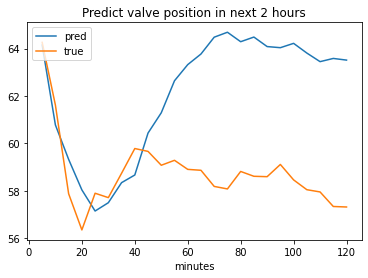

In [ ]:
demo_path = r'/content/drive/MyDrive/APS490/ML/model6_demo_content/'
if not os.path.exists(demo_path):
  os.mkdir(demo_path)

# mse
lstm_mse_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_lstm/mse_optimized_model/'
os.chdir(lstm_mse_results_path)
for filename in os.listdir():
  if filename.startswith('model'):
    lstm = torch.load(filename)
  elif filename.startswith('pre'):
    lstm_mse_prediction = pd.read_csv(filename)
  elif filename.startswith('true'):
    lstm_mse_true = pd.read_csv(filename)

lstm_pred_sample = np.array(lstm_mse_prediction)[sample_index][1:]
lstm_true_sample = np.array(lstm_mse_true)[sample_index][1:]
lstm_loss = mean_squared_error(lstm_pred_sample, lstm_true_sample)

l = len(lstm_true_sample)
timestamps = np.array(df[[date]])[-l:].reshape(l)

plt.title('Predict valve position in next 2 hours')
plt.plot([ 5*(i+1) for i in range(l)], lstm_pred_sample, label = "pred")
plt.plot([ 5*(i+1) for i in range(l)], lstm_true_sample, label = "true")
plt.xlabel('minutes')
plt.legend(loc="upper left")

mse_lstm_mape = pd.DataFrame({date:timestamps, input2:(np.abs(lstm_pred_sample-lstm_true_sample))/lstm_true_sample})

In [ ]:
mse_lstm_mape


,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position
0,2021-08-22 19:00:00,0.001767
1,2021-08-22 19:05:00,0.013619
2,2021-08-22 19:10:00,0.025075
3,2021-08-22 19:15:00,0.029994
4,2021-08-22 19:20:00,0.012970
5,2021-08-22 19:25:00,0.003721
6,2021-08-22 19:30:00,0.006738
7,2021-08-22 19:35:00,0.018699
8,2021-08-22 19:40:00,0.012986
9,2021-08-22 19:45:00,0.037505


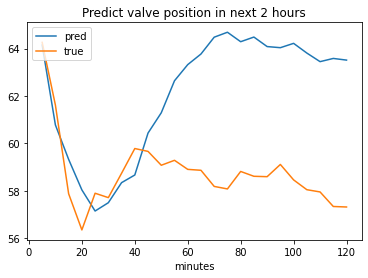

In [ ]:
gru_mse_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_gru/mse_optimized_model/'
os.chdir(lstm_mse_results_path)
for filename in os.listdir():
  if filename.startswith('model'):
    gru = torch.load(filename)
  elif filename.startswith('pre'):
    gru_mse_prediction = pd.read_csv(filename)
  elif filename.startswith('true'):
    gru_mse_true = pd.read_csv(filename)

gru_pred_sample = np.array(gru_mse_prediction)[sample_index][1:]
gru_true_sample = np.array(gru_mse_true)[sample_index][1:]
gru_loss = mean_squared_error(gru_pred_sample, gru_true_sample)

l = len(gru_true_sample)
timestamps = np.array(df[[date]])[-l:].reshape(l)

plt.title('Predict valve position in next 2 hours')
plt.plot([ 5*(i+1) for i in range(l)], gru_pred_sample, label = "pred")
plt.plot([ 5*(i+1) for i in range(l)], gru_true_sample, label = "true")
plt.xlabel('minutes')
plt.legend(loc="upper left")
plt.savefig(demo_path + 'demo.png')

mse_demo = pd.DataFrame({date:timestamps, input2:list(gru_pred_sample)})

mse_gru_mape = pd.DataFrame({date:timestamps, input2:(np.abs(gru_pred_sample-gru_true_sample))/gru_true_sample})
mse_gru_mape.to_csv(demo_path + 'error.csv')

In [ ]:
mse_gru_mape

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position
0,2021-08-22 19:00:00,0.001767
1,2021-08-22 19:05:00,0.013619
2,2021-08-22 19:10:00,0.025075
3,2021-08-22 19:15:00,0.029994
4,2021-08-22 19:20:00,0.012970
5,2021-08-22 19:25:00,0.003721
6,2021-08-22 19:30:00,0.006738
7,2021-08-22 19:35:00,0.018699
8,2021-08-22 19:40:00,0.012986
9,2021-08-22 19:45:00,0.037505


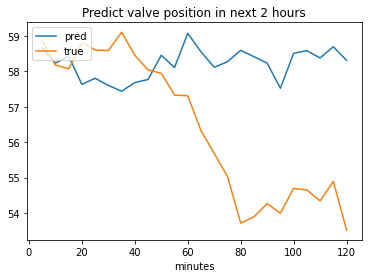

In [ ]:
# mae
lstm_mae_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_lstm/mae_optimized_model/'
os.chdir(lstm_mae_results_path)
for filename in os.listdir():
  if filename.startswith('model'):
    lstm = torch.load(filename)
  elif filename.startswith('pre'):
    lstm_mae_prediction = pd.read_csv(filename)
  elif filename.startswith('true'):
    lstm_mae_true = pd.read_csv(filename)

lstm_pred_sample = np.array(lstm_mae_prediction)[sample_index][1:]
lstm_true_sample = np.array(lstm_mae_true)[sample_index][1:]
lstm_loss = mean_squared_error(lstm_pred_sample, lstm_true_sample)

l = len(lstm_true_sample)
timestamps = np.array(df[[date]])[-l:].reshape(l)

plt.title('Predict valve position in next 2 hours')
plt.plot([ 5*(i+1) for i in range(l)], lstm_pred_sample, label = "pred")
plt.plot([ 5*(i+1) for i in range(l)], lstm_true_sample, label = "true")
plt.xlabel('minutes')
plt.legend(loc="upper left")

mae_lstm_mape = pd.DataFrame({date:timestamps, input2:(np.abs(lstm_pred_sample-lstm_true_sample))/lstm_true_sample})

In [ ]:
mae_lstm_mape

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position
0,2021-08-22 19:00:00,0.003231
1,2021-08-22 19:05:00,0.000922
2,2021-08-22 19:10:00,0.006141
3,2021-08-22 19:15:00,0.019995
4,2021-08-22 19:20:00,0.013675
5,2021-08-22 19:25:00,0.016802
6,2021-08-22 19:30:00,0.028206
7,2021-08-22 19:35:00,0.013178
8,2021-08-22 19:40:00,0.004638
9,2021-08-22 19:45:00,0.008829


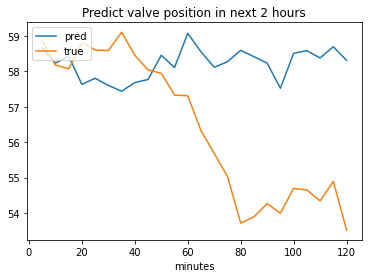

In [ ]:


gru_mae_results_path = r'/content/drive/MyDrive/APS490/ML/model6_results_gru/mae_optimized_model/'
os.chdir(lstm_mae_results_path)
for filename in os.listdir():
  if filename.startswith('model'):
    gru = torch.load(filename)
  elif filename.startswith('pre'):
    gru_mae_prediction = pd.read_csv(filename)
  elif filename.startswith('true'):
    gru_mae_true = pd.read_csv(filename)

gru_pred_sample = np.array(gru_mae_prediction)[sample_index][1:]
gru_true_sample = np.array(gru_mae_true)[sample_index][1:]
gru_loss = mean_squared_error(gru_pred_sample, gru_true_sample)

l = len(gru_true_sample)
timestamps = np.array(df[[date]])[-l:].reshape(l)

plt.title('Predict valve position in next 2 hours')
plt.plot([ 5*(i+1) for i in range(l)], gru_pred_sample, label = "pred")
plt.plot([ 5*(i+1) for i in range(l)], gru_true_sample, label = "true")
plt.xlabel('minutes')
plt.legend(loc="upper left")
mae_gru_mape = pd.DataFrame({date:timestamps, input2:(np.abs(gru_pred_sample-gru_true_sample))/gru_true_sample})

mae_demo = pd.DataFrame({date:timestamps, input2:list(gru_pred_sample)})

In [ ]:
mae_gru_mape

,DateTime_x,Modern Niagara > CPPIB > 17th Flr > VAV-1704 > Fin Tube Radiation.Valve Position
0,2021-08-22 19:00:00,0.003231
1,2021-08-22 19:05:00,0.000922
2,2021-08-22 19:10:00,0.006141
3,2021-08-22 19:15:00,0.019995
4,2021-08-22 19:20:00,0.013675
5,2021-08-22 19:25:00,0.016802
6,2021-08-22 19:30:00,0.028206
7,2021-08-22 19:35:00,0.013178
8,2021-08-22 19:40:00,0.004638
9,2021-08-22 19:45:00,0.008829


In [ ]:
mse_demo.to_csv(demo_path+'demo_prediction_mse.csv')
